In [4]:
library(IRdisplay)
display_html("<style>.container { width:95% !important; }</style>")

In [6]:
library("dplyr")
library("Seurat")
library("patchwork")
library("Matrix")
library("biomaRt")  
library("ggplot2")
library("celda")  
library("DoubletFinder")
library("harmony")  
library("presto")  
library("biomaRt")
library("glmGamPoi")
library("RColorBrewer")

set.seed(1234)

# INDEX
[Import data](#Import-data)

[SCT](#SCT)

[PCA](#PCA)

[Clustering and UMAP](#Clustering-and-UMAP)

## Import data

In [6]:
adult_Turin <- readRDS('/Adult_Brain_Neurons_29yo_Turin_NOmiscellaneousSplatter_SCT.rds')

In [44]:
grafts <- readRDS('/ENSEMBL_GENES_grafts_Conforti_markers_annotation_PreDMSNs_unified.rds')

In [50]:
grafts_noAstro <- subset(grafts, subset = annotation_unified != 'Astrocytes')


            Astrocytes       CGE interneurons          Emerging MSNs 
                 12005                    476                    400 
MGE-LAMP5 interneurons  MGE-like interneurons               MSN-like 
                  1782                   1210                   1493 

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,old.ident,⋯,SCT_snn_res.0.05,seurat_clusters,SCT_snn_res.0.25,SCT_snn_res.0.45,SCT_snn_res.0.65,SCT_snn_res.0.85,annotation_markers,match_ann,annotation_markers2,annotation_unified
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>
MR24_R10_trp1_AAACGAATCCACGGGT-1,MR24_R10_trp1_S28,18319,5683,0,7857,3812,-0.011861547,-0.023103307,G1,G1,⋯,3,14,8,10,12,14,MSN,equal,Pre-D2-MSN-like,MSN-like
MR24_R10_trp1_AAACGCTGTGCGGTAA-1,MR24_R10_trp1_S28,15222,5576,0,8347,4640,-0.037698699,-0.073956441,G1,G1,⋯,3,14,5,10,12,14,MSN,equal,Pre-D2-MSN-like,MSN-like
MR24_R10_trp1_AAAGAACTCGGCTGAC-1,MR24_R10_trp1_S28,1015,779,0,5212,1950,-0.040467565,-0.024730057,G1,G1,⋯,3,8,5,5,6,8,Pre-D1-MSNs,different,Pre-D1-MSN-like,MSN-like
MR24_R10_trp1_AAAGTGACACGCTGTG-1,MR24_R10_trp1_S28,6343,2624,0,6711,2624,0.012864748,0.009868678,S,S,⋯,2,2,3,3,3,2,MGE-LAMP5 interneurons,equal,MGE-LAMP5 interneurons,MGE-LAMP5 interneurons
MR24_R10_trp1_AACAACCAGAGAGAAC-1,MR24_R10_trp1_S28,13370,4172,0,8301,3832,-0.036087212,-0.025852295,G1,G1,⋯,2,5,4,4,4,5,MGE-like interneurons,equal,MGE-like interneurons,MGE-like interneurons
MR24_R10_trp1_AACAAGAAGGCGATAC-1,MR24_R10_trp1_S28,14390,4366,0,8286,3778,-0.063388186,-0.018323190,G1,G1,⋯,2,2,3,3,3,2,MGE-LAMP5 interneurons,equal,MGE-LAMP5 interneurons,MGE-LAMP5 interneurons
MR24_R10_trp1_AACACACAGAGGTCGT-1,MR24_R10_trp1_S28,25355,5898,0,7596,3081,-0.068752114,-0.009795455,G1,G1,⋯,2,11,4,4,9,11,CGE interneurons,equal,CGE interneurons,CGE interneurons
MR24_R10_trp1_AACCAACAGGAGACCT-1,MR24_R10_trp1_S28,10443,3908,0,8121,3905,-0.060966918,0.017378049,G2M,G2M,⋯,2,2,3,3,3,2,MGE-LAMP5 interneurons,equal,MGE-LAMP5 interneurons,MGE-LAMP5 interneurons
MR24_R10_trp1_AACCAACAGTCTCGTA-1,MR24_R10_trp1_S28,11037,3924,0,8114,3916,-0.067621363,-0.043045117,G1,G1,⋯,3,18,11,13,15,18,Emerging MSNs,different,Emerging MSNs,Emerging MSNs


In [51]:
grafts_noAstro$dataset <- 'Conforti'
adult_Turin$dataset <- 'Adult_subsetted'

In [ ]:
#To have a single column in the merged dataset to be used for PCA
colnames(grafts_noAstro@meta.data)[colnames(grafts_noAstro@meta.data) == "annotation_unified"] = "Cell_population"
colnames(adult_Turin@meta.data)[colnames(adult_Turin@meta.data) == "supercluster_term"] = "Cell_population"

In [62]:
conf_adult_Turin <- merge(grafts_noAstro, y = adult_Turin, project = 'Single-cell-Analysis')

In [68]:
conf_adult_Turin <- JoinLayers(conf_adult_Turin, assay = 'RNA')
conf_adult_Turin

An object of class Seurat 
105045 features across 142838 samples within 2 assays 
Active assay: RNA (61143 features, 2000 variable features)
 5 layers present: counts, data.SeuratProject, scale.data.SeuratProject, data, scale.data
 1 other assay present: SCT

In [ ]:
conf_adult_Turin$SCT_snn_res.0.05 <- NULL
conf_adult_Turin$SCT_snn_res.0.25 <- NULL
conf_adult_Turin$SCT_snn_res.0.45 <- NULL
conf_adult_Turin$seurat_clusters <- NULL
conf_adult_Turin$sex <- NULL
conf_adult_Turin$disease <- NULL
conf_adult_Turin$observation_joinid <- NULL
conf_adult_Turin$organism_ontology_term_id <- NULL
conf_adult_Turin$disease_ontology_term_id <- NULL
conf_adult_Turin$self_reported_ethnicity_ontology_term_id <- NULL
conf_adult_Turin$assay_ontology_term_id <- NULL
conf_adult_Turin$sex_ontology_term_id <- NULL
conf_adult_Turin$development_stage_ontology_term_id <- NULL
conf_adult_Turin$is_primary_data <- NULL
conf_adult_Turin$self_reported_ethnicity <- NULL
conf_adult_Turin$organism <- NULL

## SCT

In [ ]:
conf_adult_Turin@assays$SCT <- NULL
conf_adult_Turin <- SCTransform(conf_adult_Turin, vst.flavor = "v2", variable.features.n = 3000,  ncells = 5000)

## PCA

In [6]:
human_sub_genes <- readRDS('/geneNames_conversion/GTF_HumanGenes_IDandName_subsetted.rds')
head(human_sub_genes)

,gene_id,name,combined_name
,<chr>,<chr>,<chr>
6,ENSG00000238009,None,ENSG00000238009
9,ENSG00000241860,None,ENSG00000241860
10,ENSG00000241599,None,ENSG00000241599
11,ENSG00000286448,None,ENSG00000286448
13,ENSG00000290385,None,ENSG00000290385
15,ENSG00000235146,None,ENSG00000235146


In [11]:
#To obtain the genes involved in cell cycle with the ENSEMBL name
human_s.genes <- subset(human_sub_genes, subset = name %in% cc.genes$s.genes)
s.genes <- human_s.genes$gene_id

human_g2m.genes <- subset(human_sub_genes, subset = name %in% cc.genes$g2m.genes)
g2m.genes <- human_g2m.genes$gene_id

In [ ]:
#Cell cycle scoring
s.genes <- human_s.genes$gene_id
g2m.genes <- human_g2m.genes$gene_id
conf_adult_Turin <- CellCycleScoring(conf_adult_Turin, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
conf_adult_Turin$CC.Difference <- conf_adult_Turin$S.Score - conf_adult_Turin$G2M.Score

#Run PCA on variable genes
conf_adult_Turin <- RunPCA(conf_adult_Turin, features = VariableFeatures(object = conf_adult_Turin), npcs = 50, reduction.name = "pca")
DimPlot(conf_adult_Turin, reduction = "pca", group.by = "orig.ident", dims = c(1, 2)) + ggtitle("PCA on highly variable genes")
ElbowPlot(conf_adult_Turin, reduction = "pca", ndims = 50)

In [23]:
conf_adult_Turin$samples <- ifelse(conf_adult_Turin$dataset == 'Conforti', conf_adult_Turin$orig.ident, 'Adult_public')

## Clustering and UMAP

In [ ]:
num_dims <- 50
conf_adult_Turin <- RunUMAP(conf_adult_Turin, dims = 1:num_dims, reduction = "pca", reduction.name = "umap", reduction.key = "umap")

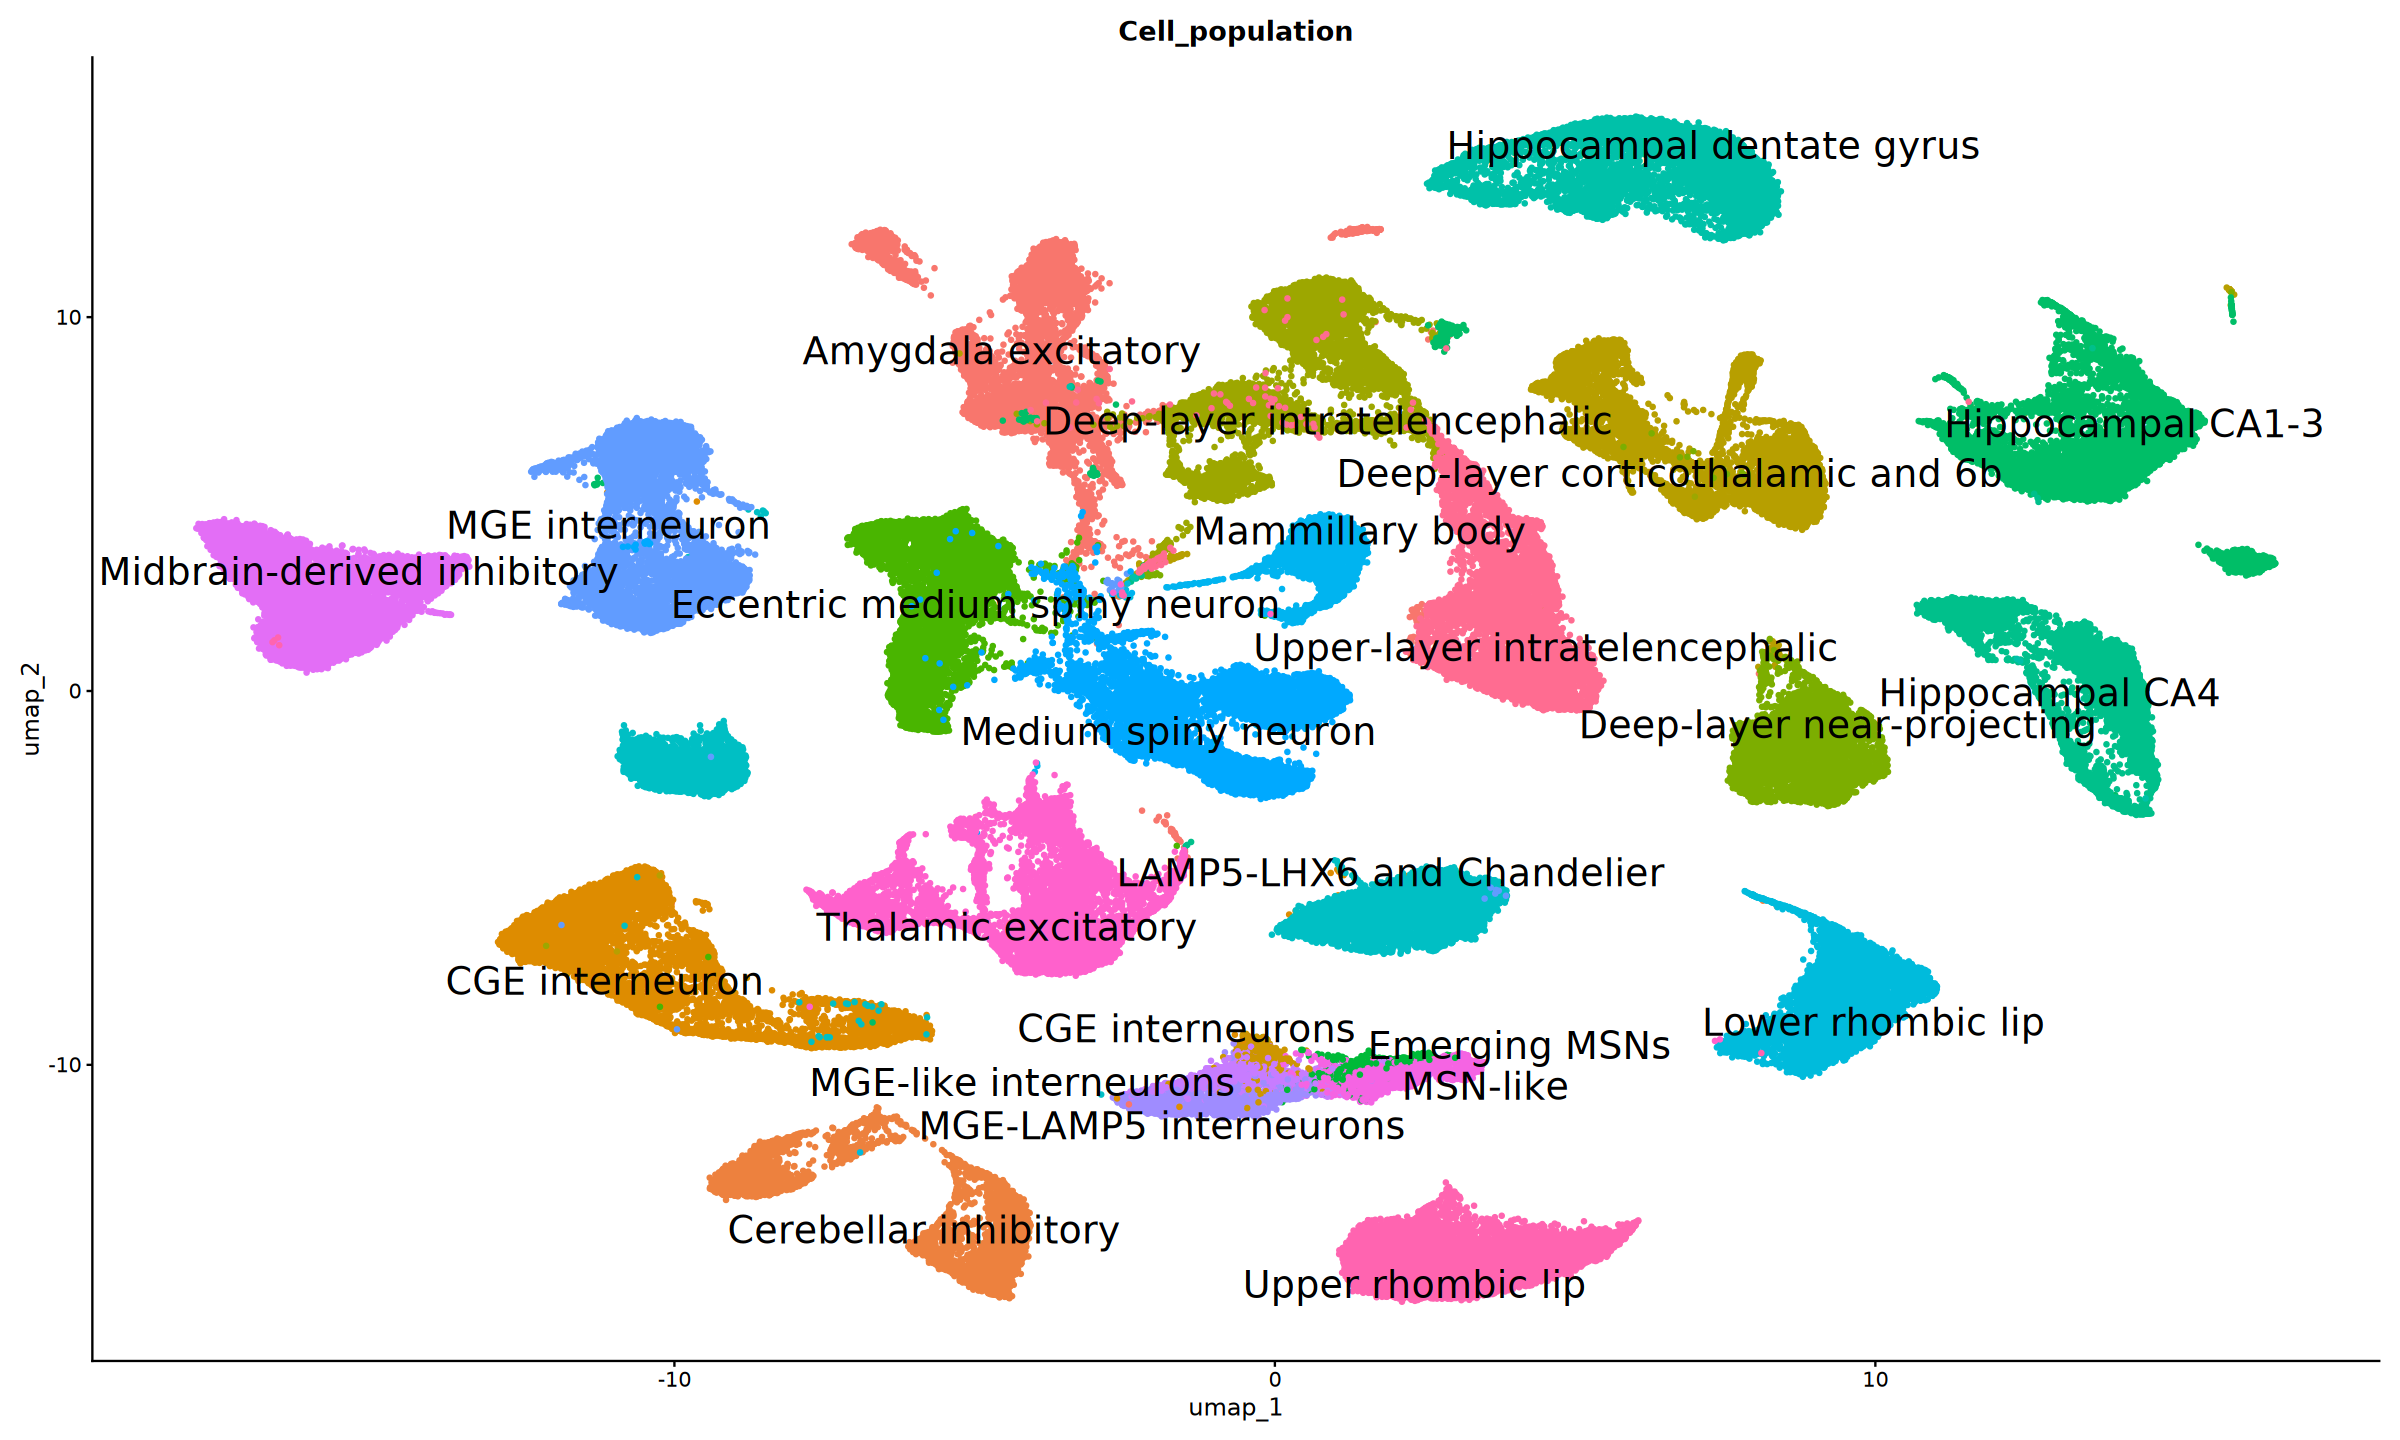

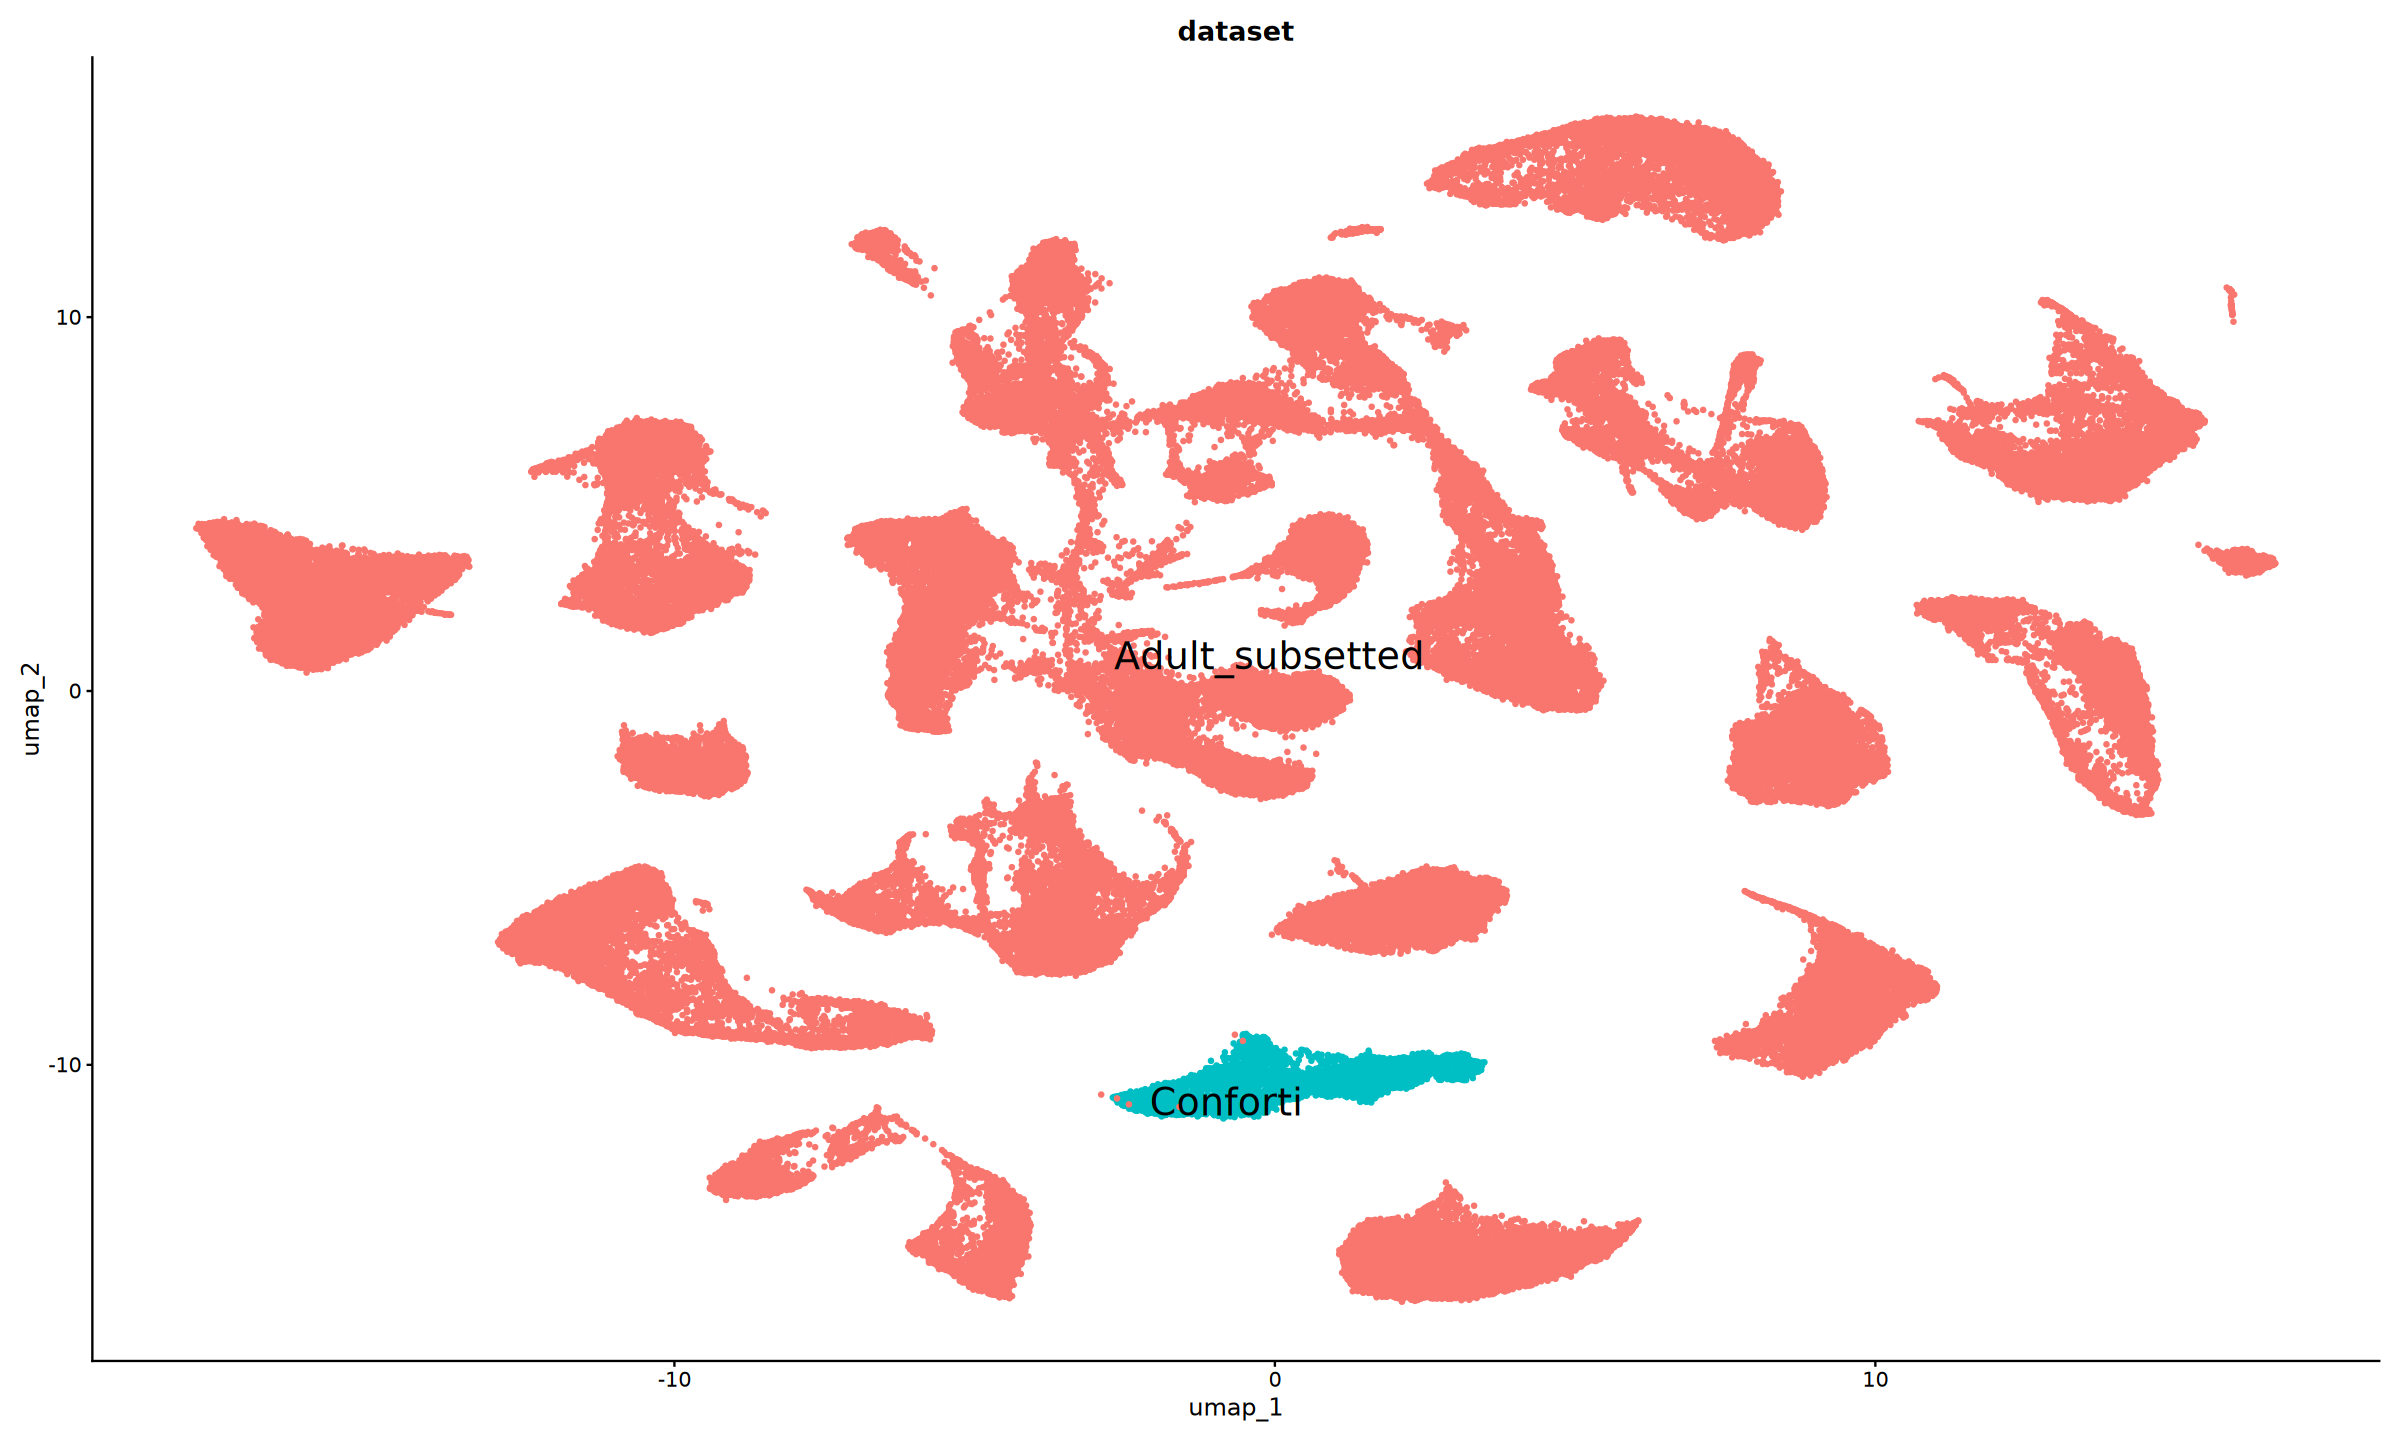

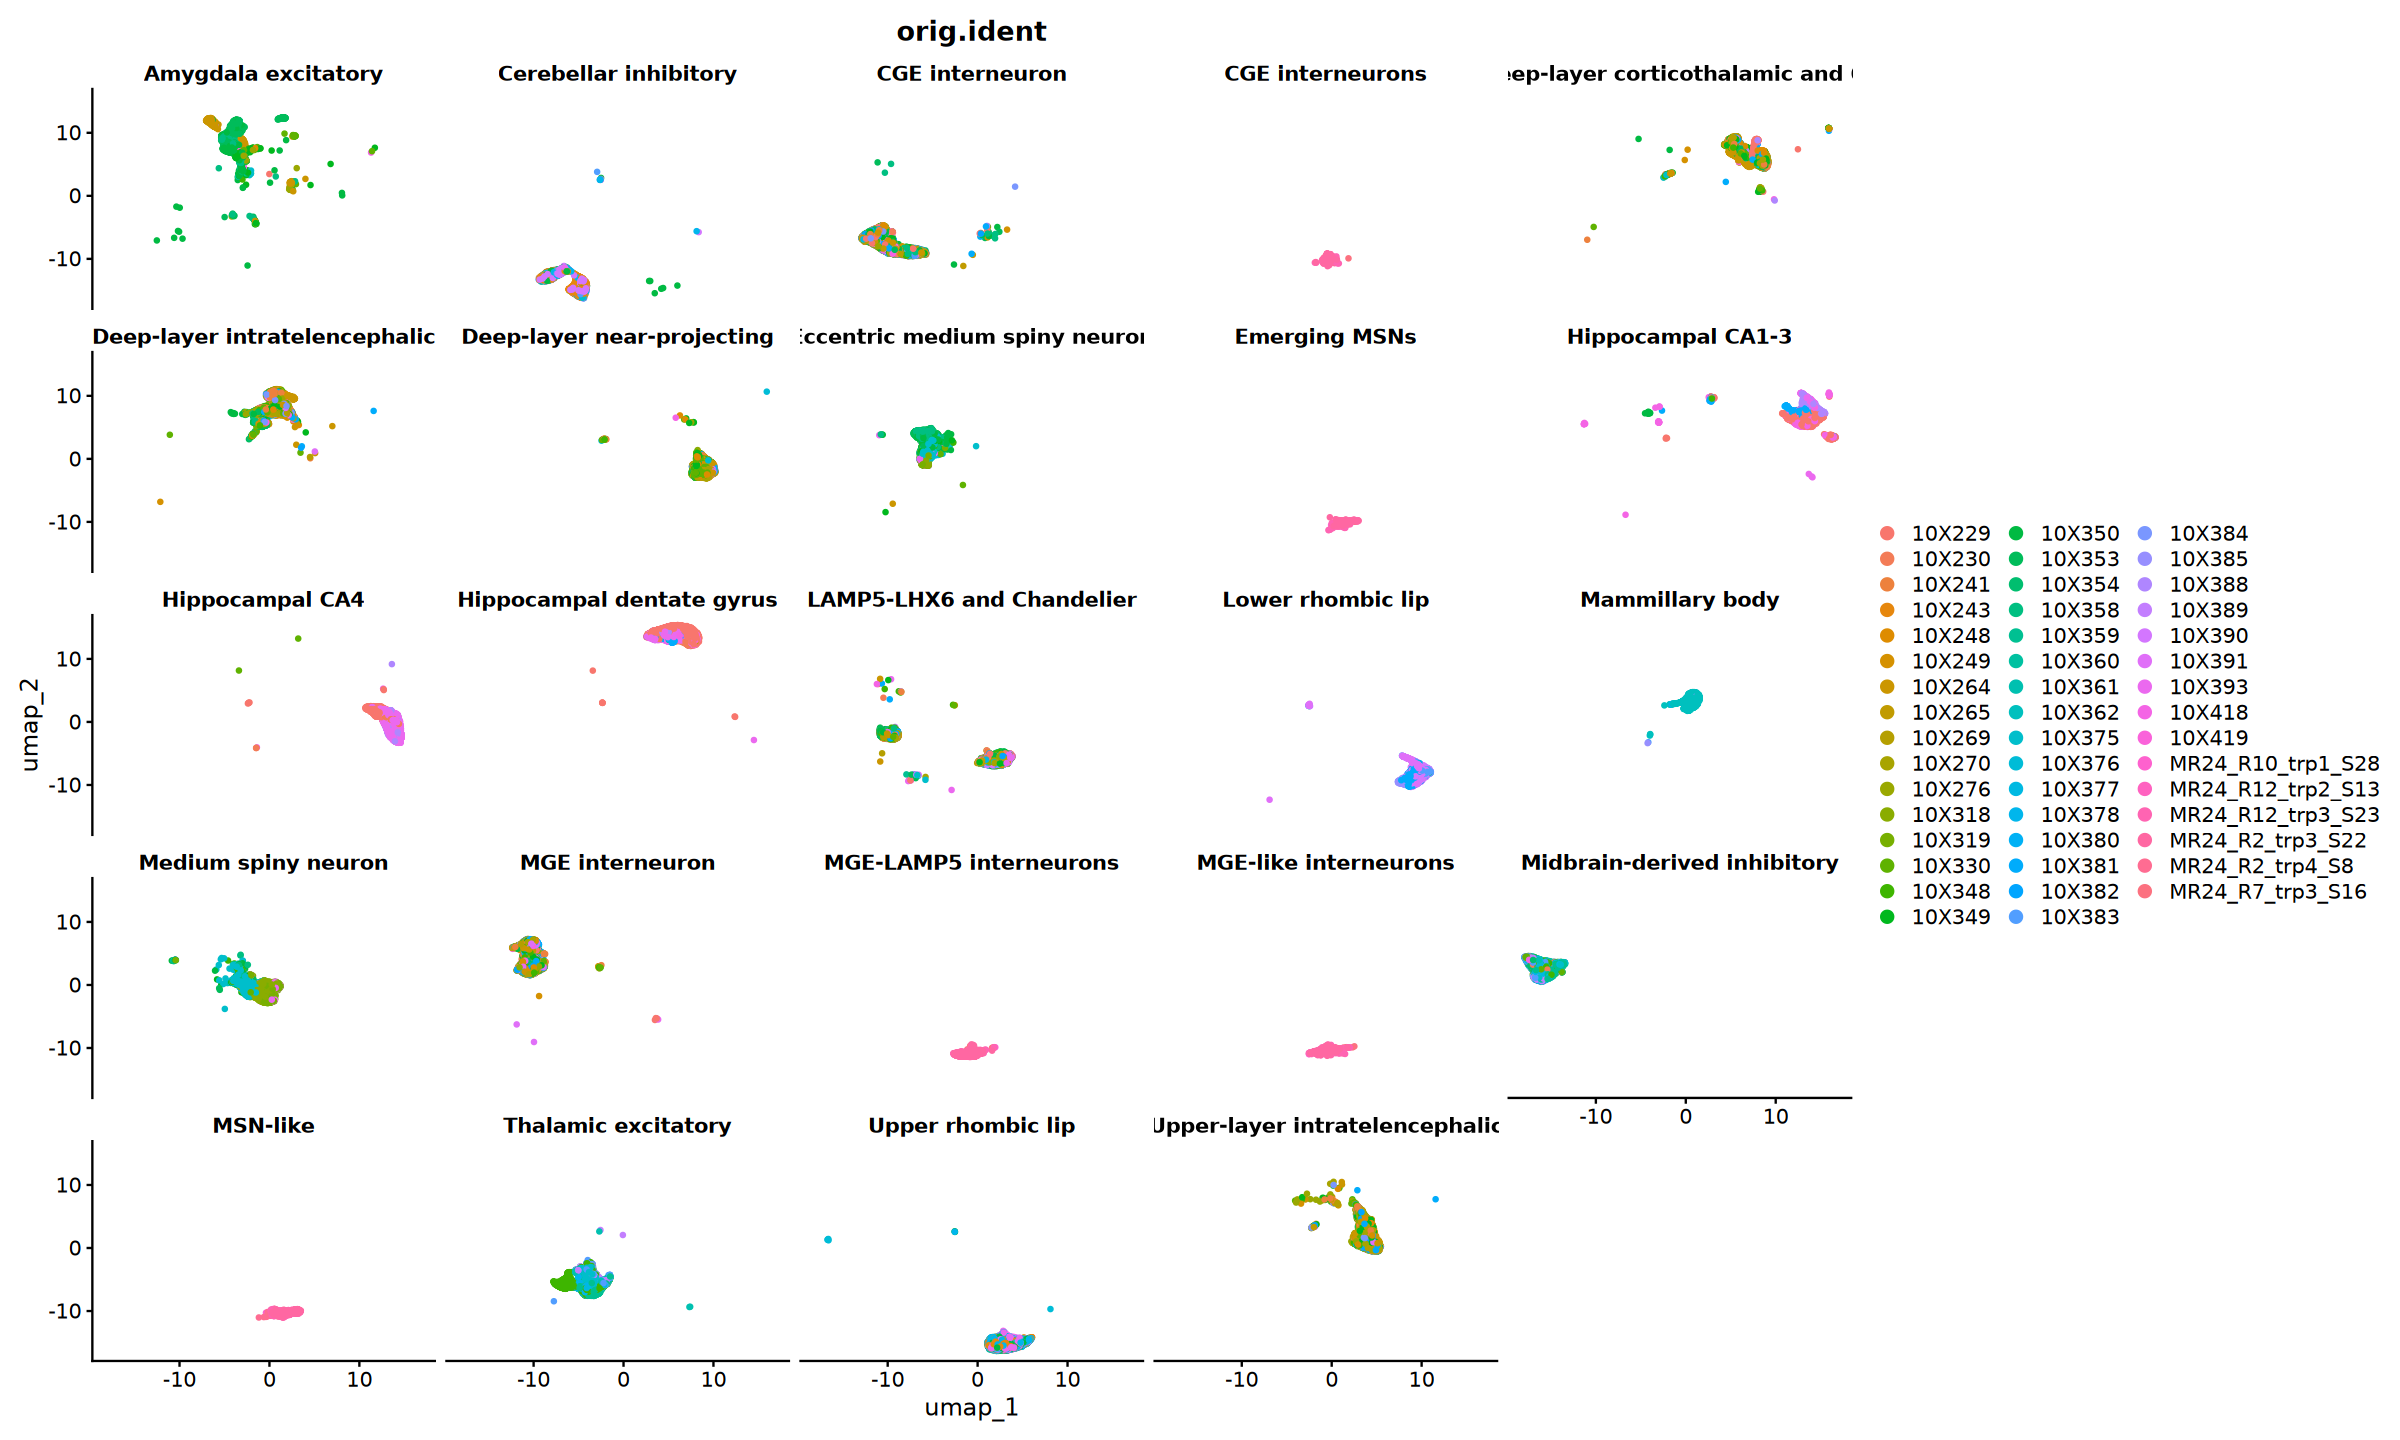

In [34]:
options(repr.plot.width=20, repr.plot.height=12)   #for graphs

DimPlot(conf_adult_Turin, reduction = "umap", group.by = "Cell_population", pt.size = 0.8, label = TRUE, label.size = 8, repel = TRUE, raster = FALSE) + NoLegend()
DimPlot(conf_adult_Turin, reduction = "umap", group.by = "dataset", pt.size = 0.8, label = TRUE, label.size = 8, repel = TRUE, raster = FALSE) + NoLegend()
DimPlot(conf_adult_Turin, reduction = "umap", group.by = "orig.ident", split.by = "Cell_population", pt.size = 0.8, raster = FALSE, ncol = 5)

In [33]:
saveRDS(conf_adult_Turin, '/mnt/projects/labs/CLAB/PROJECT_GRAFTS/Backup_Grafts_MM/Backup_final_grafts/ENSEMBL_GENES_Adult_subsetted_Turin_e_ConfortiGrafts_noAstroandNA_merged_SCT_UMAP.rds')

## Batch correction

In [ ]:
conf_adult_Turin <- RunHarmony(conf_adult_Turin, 'samples', orig.reduction = "pca", new.reduction = "harmonyPca")

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)   #for graphs
num_dims <- 50

#Clustering: determine best resolution value
conf_adult_Turin <- FindNeighbors(conf_adult_Turin, reduction = "harmony", dims = 1:num_dims)
for (res_val in seq(0.05, 0.65, 0.2)) {
  conf_adult_Turin <- FindClusters(conf_adult_Turin, resolution = res_val, method = 4)
conf_adult_Turin = RunUMAP(conf_adult_Turin, dims = 1:num_dims, reduction = "harmony", reduction.name = "harmony_umap")
  p <- DimPlot(conf_adult_Turin, reduction = "harmony_umap", group.by = "seurat_clusters", pt.size = 1, label = TRUE, label.size = 8, raster = FALSE) + 
        ggtitle(paste0("Seurat clusters - resolution = ", res_val)) + xlab("UMAP_1") + ylab("UMAP_2")
  plot(p)
}

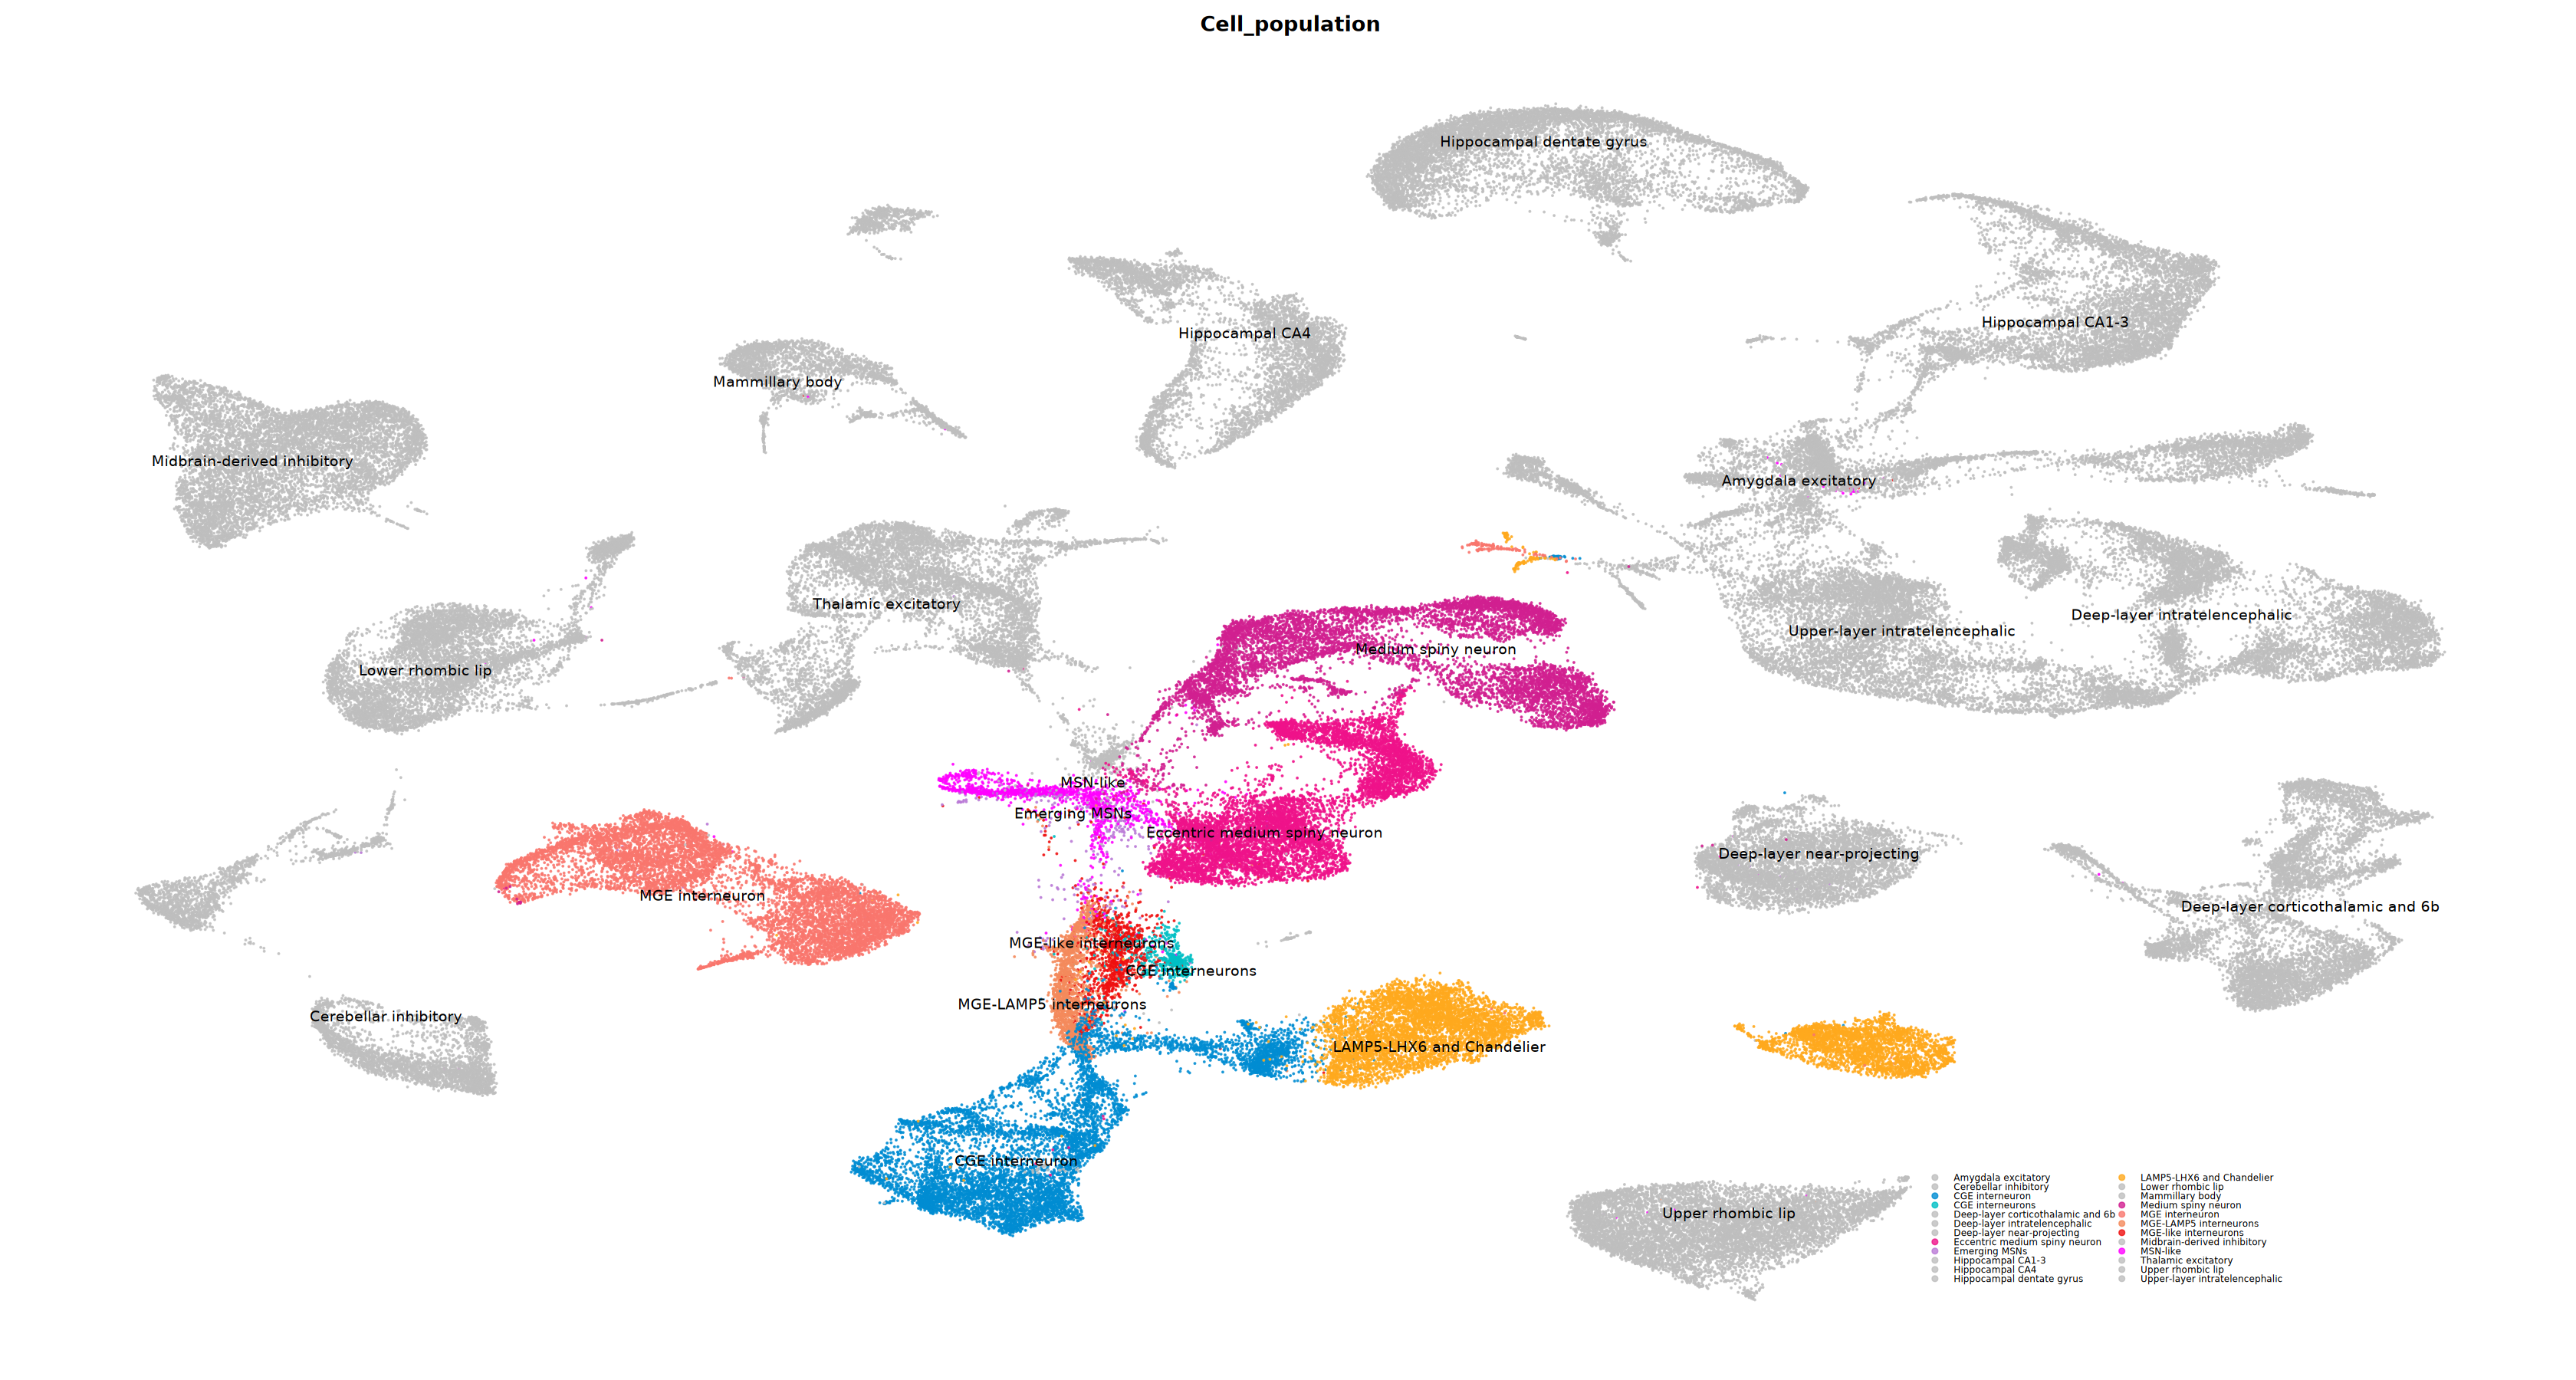

In [98]:
options(repr.plot.width=28, repr.plot.height=15)   #for graphs

colors = c(rep('grey', 2), '#008CD2', '#00BFC4', rep('grey', 3), 'deeppink2', '#B979D5', rep('grey', 3), '#FFA91D', rep('grey', 2), 'violetred', '#F8766D', '#F38A5B', '#EE1010',
           'grey', 'magenta', rep('grey', 7))

DimPlot(conf_adult_Turin, reduction = "harmony_umap", group.by = "Cell_population", pt.size = 0.05, alpha = 0.8, label = TRUE, label.size = 4, raster = FALSE, repel = TRUE, cols = colors) + #NoLegend()
    theme(legend.position = c(0.75, 0.1), 
          legend.text = element_text(size = 7), legend.key.height = unit(0.5, "lines")) + 
    guides(color = guide_legend(override.aes = list(size = 1.5))) +
    NoAxes()

ggsave("Plots/Sc_analysis/UMAP_both_postHarmony_highlited cellTypes.pdf", device = pdf, height = 9, width = 15)